In [35]:
# If not installed, install OpenCV and dlib via the following commands from cmd
# pip install opencv-contrib-python
# pip install dlib

In [36]:
# Helper function for converting 'the bounding box coordinates returned by dlib' to 'standart OpenCV ordering'
def convert_and_trim_bb(img, rect):
    # Extract starting and ending (x,y) coordinates for a given bounding box
    startX = rect.left()
    startY = rect.top()
    endX = rect.right()
    endY = rect.bottom()
    
    # Check if  the (x,y) coordinates of the bounding box is within the dimensions for a given image
    startX = max(0, startX)
    startY = max(0, startY)
    endX = min(endX, img.shape[1])
    endY = min(endY, img.shape[0])
    
    # Compute the width and height of the bounding box
    wbb = endX - startX
    hbb = endY - startY
    
    # Return the the coordinates of the bounding box in standard OpenCV ordering
    return (startX, startY, wbb, hbb)

In [37]:
import imutils
import dlib # for its face detection functionality
import cv2 # for OpenCV bindings
import time

**PART I: HOG + LINEAR SVM FACE DETECTOR**

**IMAGE 1**

In [38]:
imgPath = "C:/Users/fatih.gokmenoglu/Downloads/roy_pris.jpg"

In [39]:
# Load HOG + Linear SVM face detector
detector = dlib.get_frontal_face_detector()

# Load the input image from disk, resize it and convert it from BGR to RGB channel ordering (for dlib)
img = cv2.imread(imgPath)
img = imutils.resize(img, width=600)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform face detection
start = time.time()
rects = detector(rgb)
end = time.time()
print("[INFO] Face detection took {:.4f} seconds".format(end - start))

[INFO] Face detection took 0.0250 seconds


In [41]:
# Convert dlib rectangle objects to bounding boxes
boxes = [convert_and_trim_bb(img, r) for r in rects]

# Loop over the bounding boxes and draw them on the image provided
for (x, y, w, h) in boxes:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Show the output image
cv2.imshow("Output", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**IMAGE 2**

In [42]:
img2Path = "C:/Users/fatih.gokmenoglu/Downloads/rick_rachel.jpg"

In [43]:
# Load the input image from disk, resize it and convert it from BGR to RGB channel ordering (for dlib)
img2 = cv2.imread(img2Path)
img2 = imutils.resize(img2, width=600)
rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Perform face detection
start = time.time()
rects2 = detector(rgb2)
end = time.time()
print("[INFO] Face detection took {:.4f} seconds".format(end - start))

[INFO] Face detection took 0.0190 seconds


In [44]:
# Convert dlib rectangle objects to bounding boxes
boxes2 = [convert_and_trim_bb(img2, r) for r in rects2]

# Loop over the bounding boxes and draw them on the image provided
for (x, y, w, h) in boxes2:
    cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Show the output image
cv2.imshow("Output", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

**IMAGE 3**

In [45]:
img3Path = "C:/Users/fatih.gokmenoglu/Downloads/bladerunner1982.jpg"

In [46]:
# Load the input image from disk, resize it and convert it from BGR to RGB channel ordering (for dlib)
img3 = cv2.imread(img3Path)
img3 = imutils.resize(img3, width=600)
rgb3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Perform face detection
start = time.time()
rects3 = detector(rgb3)
end = time.time()
print("[INFO] Face detection took {:.4f} seconds".format(end - start))

[INFO] Face detection took 0.0660 seconds


In [47]:
# Convert dlib rectangle objects to bounding boxes
boxes3 = [convert_and_trim_bb(img2, r) for r in rects3]

# Loop over the bounding boxes and draw them on the image provided
for (x, y, w, h) in boxes3:
    cv2.rectangle(img3, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Show the output image
cv2.imshow("Output", img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

**PART II: CNN FACE DETECTOR**

**IMAGE 1**

In [48]:
# Create a variable to hold pre-trained dlib MMOD CNN face detector
modelPath = "C:/Users/fatih.gokmenoglu/Downloads/mmod_human_face_detector.dat"

In [49]:
# Load MMOD CNN face detector
detector = dlib.cnn_face_detection_model_v1(modelPath)

# Load the input image from disk, resize it and convert it from BGR to RGB channel ordering (for dlib)
img = cv2.imread(imgPath)
img = imutils.resize(img, width=600)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform face detection
start = time.time()
results = detector(rgb)
end = time.time()
print("[INFO] Face detection took {:.4f} seconds".format(end - start))

[INFO] Face detection took 3.2501 seconds


In [50]:
# Convert dlib rectangle objects to bounding boxes
boxes = [convert_and_trim_bb(img, r.rect) for r in results]

# Loop over the bounding boxes and draw them on the image provided
for (x, y, w, h) in boxes:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Show the output image
cv2.imshow("Output", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**IMAGE 2**

In [52]:
# Load the input image from disk, resize it and convert it from BGR to RGB channel ordering (for dlib)
img2 = cv2.imread(img2Path)
img2 = imutils.resize(img2, width=600)
rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Perform face detection
start = time.time()
results2 = detector(rgb2)
end = time.time()
print("[INFO] Face detection took {:.4f} seconds".format(end - start))

[INFO] Face detection took 2.4700 seconds


In [53]:
# Convert dlib rectangle objects to bounding boxes
boxes2 = [convert_and_trim_bb(img2, r.rect) for r in results2]

# Loop over the bounding boxes and draw them on the image provided
for (x, y, w, h) in boxes2:
    cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Show the output image
cv2.imshow("Output", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

**IMAGE 3**

In [54]:
# Load the input image from disk, resize it and convert it from BGR to RGB channel ordering (for dlib)
img3 = cv2.imread(img3Path)
img3 = imutils.resize(img3, width=600)
rgb3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Perform face detection
start = time.time()
results3 = detector(rgb3)
end = time.time()
print("[INFO] Face detection took {:.4f} seconds".format(end - start))

[INFO] Face detection took 8.4994 seconds


In [55]:
# Convert dlib rectangle objects to bounding boxes
boxes3 = [convert_and_trim_bb(img3, r.rect) for r in results3]

# Loop over the bounding boxes and draw them on the image provided
for (x, y, w, h) in boxes3:
    cv2.rectangle(img3, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Show the output image
cv2.imshow("Output", img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

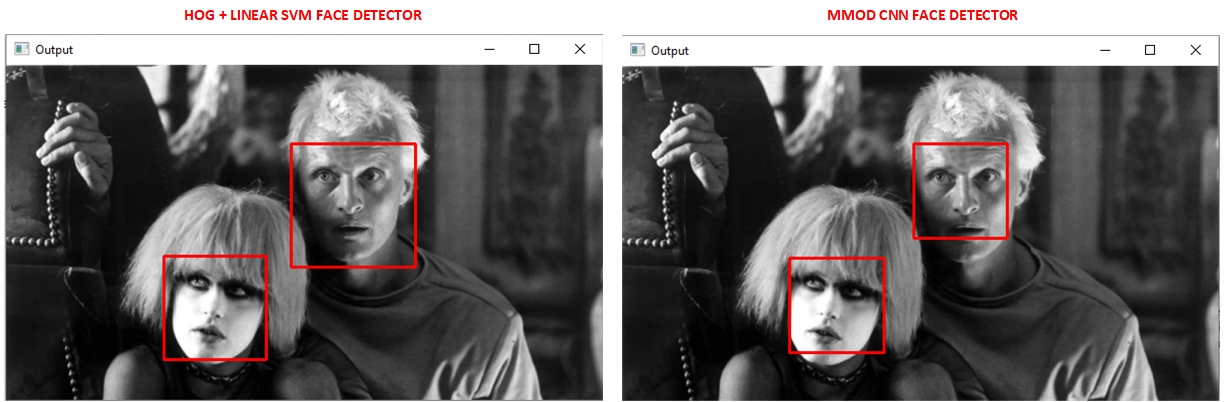

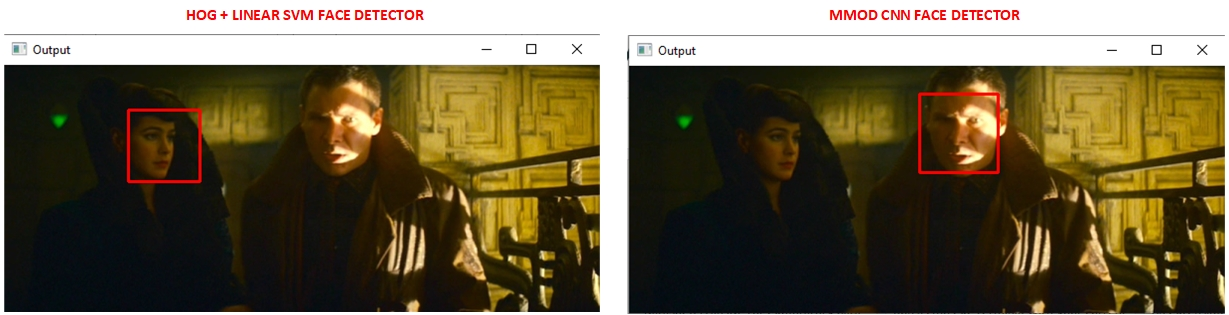

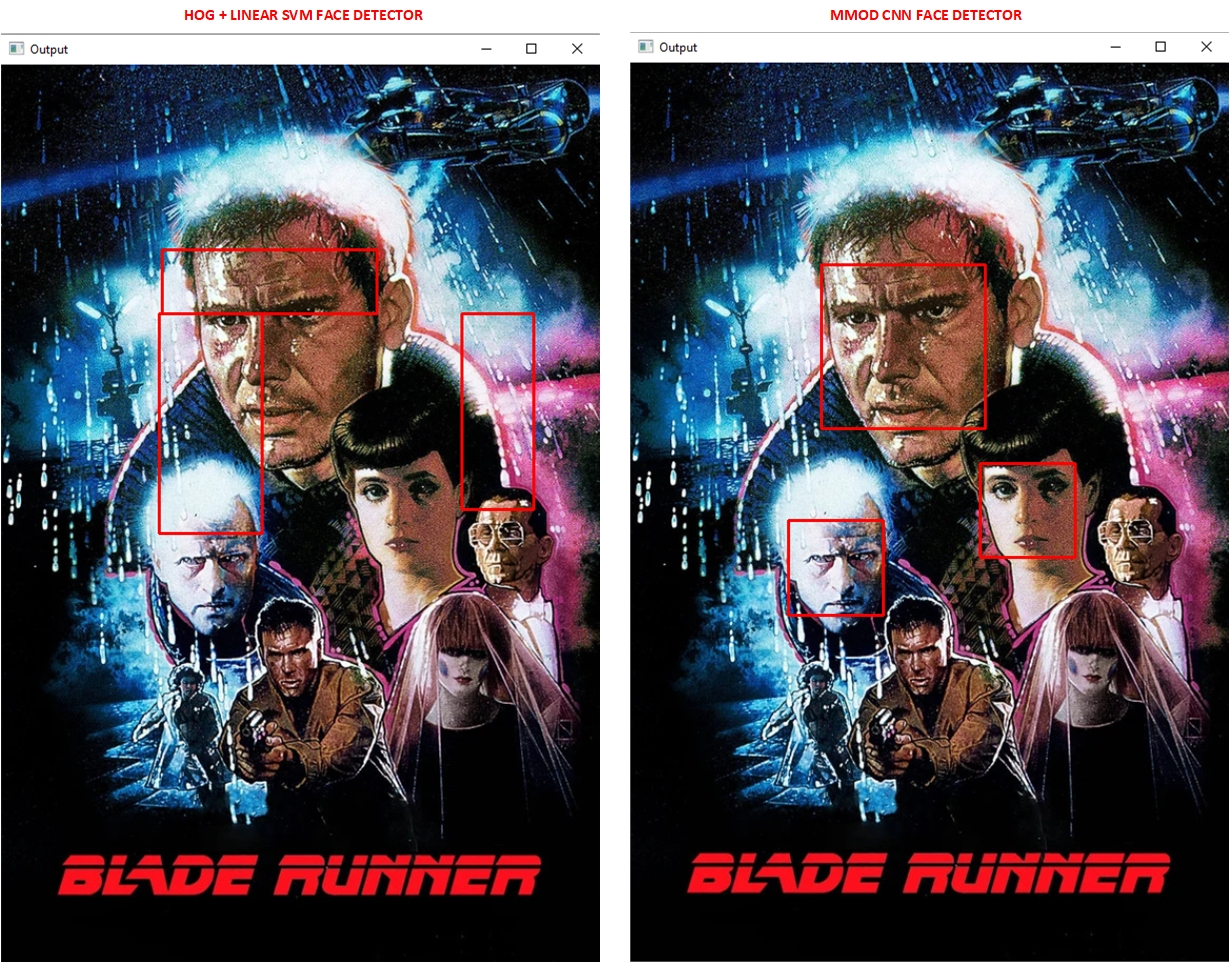